In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_excel(r'C:\Users\khasy\OneDrive\Documents\GitHub\Projects\flight_data\flight_data_test.xlsx')
df

,local_time,time,alt,mach
0,9.30001,09:18:00.036000,555.15363,0.00000
1,9.30004,09:18:00.144000,555.15363,0.00000
2,9.30006,09:18:00.216000,555.15375,0.00000
3,9.30009,09:18:00.324000,555.15375,0.00000
4,9.30013,09:18:00.468000,555.15375,0.00000
...,...,...,...,...
27410,10.06988,10:04:11.568000,278.36121,0.02567
27411,10.06990,10:04:11.640000,278.36093,0.02570
27412,10.06994,10:04:11.784000,278.36008,0.02572
27413,10.06996,10:04:11.856000,278.35913,0.02572


Text(0, 0.5, 'Mach #')

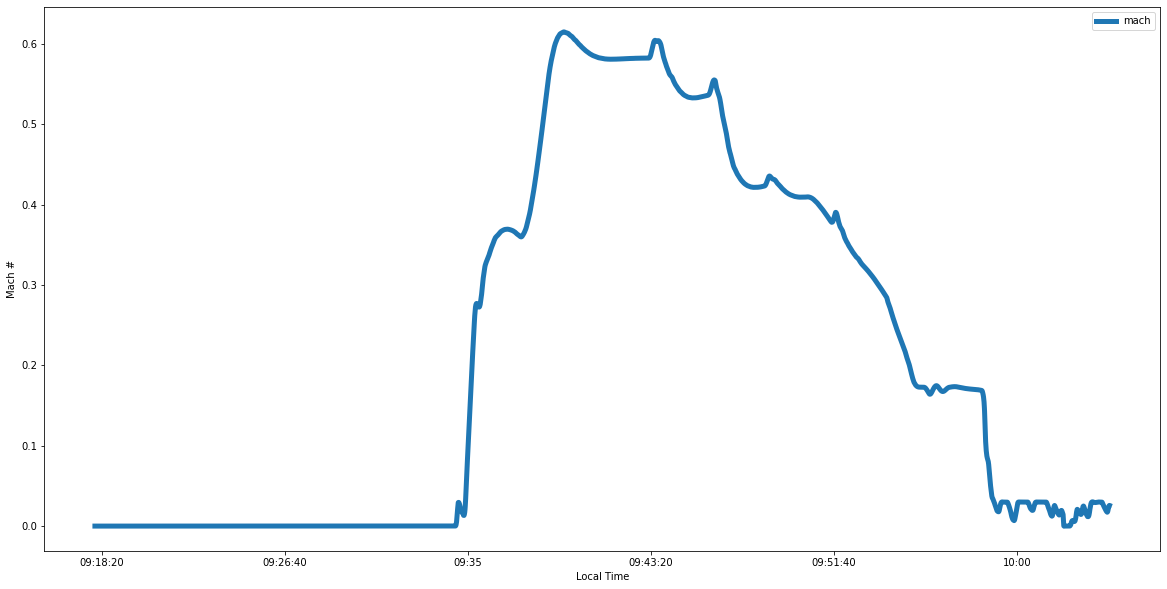

In [3]:
#Visualizing the plot
ax = df.plot(x = 'time', y = 'mach', figsize=(20,10), lw = 5)
ax.set_xlabel('Local Time')
ax.set_ylabel('Mach #')

In [19]:
X_df = df.drop(['time','alt'], axis = 1)
X_df.index.name = 'time_series'
X_df

,local_time,mach
time_series,,
0,9.30001,0.00000
1,9.30004,0.00000
2,9.30006,0.00000
3,9.30009,0.00000
4,9.30013,0.00000
...,...,...
27410,10.06988,0.02567
27411,10.06990,0.02570
27412,10.06994,0.02572


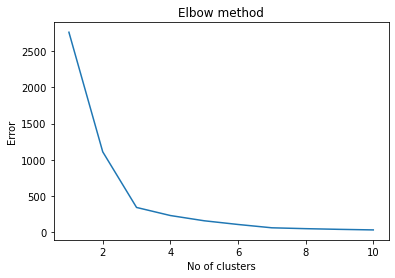

In [5]:
#Selecting the best K value candidate
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_df)
    kmeans.fit(X_df)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [1]:
#Build Model
km = KMeans(n_clusters=5)
y_km = km.fit_predict(X_df)
#Visualizing Clusters & Cluster centers
plt.scatter(X_df.iloc[:,0], X_df.iloc[:,1], c = y_km, cmap = 'rainbow')
plt.xticks(np.range(min(X_df['local_time']), max(X_df['local_time']), 0.02))
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#Figure Size
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

NameError: name 'KMeans' is not defined

In [20]:
X_df.to_csv(r'C:\Users\khasy\OneDrive\Documents\GitHub\Projects\flight_data\Final_Data.csv')